In [2]:
from eodhd import APIClient
import pandas as pd

In [3]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [4]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Financial Services'
industry_list = all_industries[sector]

In [4]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'BX', 'name': 'Blackstone Group Inc', 'last_day_data_date': '2024-06-17', 'adjusted_close': 122.16, 'refund_1d': 0.91, 'refund_1d_p': 0.75, 'refund_5d': 2.46, 'refund_5d_p': 2.06, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 146597314560, 'earnings_share': 2.84, 'dividend_yield': 0.0277, 'sector': 'Financial Services', 'industry': 'Asset Management', 'avgvol_1d': 1724402, 'avgvol_200d': 4462566.43}, {'code': 'BLK', 'name': 'BlackRock Inc', 'last_day_data_date': '2024-06-17', 'adjusted_close': 781.08, 'refund_1d': 11.75, 'refund_1d_p': 1.53, 'refund_5d': 14.91, 'refund_5d_p': 1.95, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 114322440192, 'earnings_share': 39.31, 'dividend_yield': 0.0265, 'sector': 'Financial Services', 'industry': 'Asset Management', 'avgvol_1d': 522455, 'avgvol_200d': 630920}, {'code': 'KKR', 'name': 'KKR & Co LP', 'last_day_data_date': '2024-06-17', 'adjusted_close': 110.17, 'refund_1d': 0.99, 'refund_1d

In [5]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

BX
BLK
KKR
APO
BN
BK
AMP
ARES
OWL
STT
STT-PG
CRBG
BAM
BEN
PHYS
IVZ
BXSL
FSK
JHG
PSLV
AMG
CEF
MAIN
DNP
AB
NEA
CNS
HTGC
NAD
BUR
NVG
EXG
APAM
UTF
FHI
AMK
UTG
GDV
RQI
ADX
EVT
TSLX
NUV
NZF
GOF
NAC
BDJ
USA
PTY
AMTD
GSBD
KYN
PDI
BIGZ
ETY
RVT
ETV
TY
GAB
BBUC
CLM
BSTZ
ETG
WT
DSL
STEW
BTT
GAB-PH
NFJ
EVV
FSCO
FPF
HYT
CET
RNP
GAM
BBN
ETW
PTA
NMZ
BXMX
BCSF
SII
IGR
EOS
BBDC
BCX
BST
AOD
NRK
BTZ
THQ
MQY
HTD
PX
AWF
FFC
CII
BRDG
HQH
ECC
JPC
BSIG
FAX
JQC
NOAH
MYI
EIM
PDT
PHK
BTO
PFLT
CRF
AC
BOE
NIE
MHD
WIW
EOI
PAXS
NXP
VMO
PML
PFN
CION
VVR
PCN
GGN
NKX
ETJ
EMD
THW
BGY
BHK
HFRO
DPG
IIM
BGB
JFR
BIT
VKQ
IGD
VGM
BME
MYD
RA
PEO
NBB
HPS
IQI
GHY
NXJ
AVK
IFN
AWP
BLE
VCV
MVF
MUC
BLW
BUI
DFP
PNNT
MMD
JPI
CEM
MMU
HPI
MUI
DSU
STK
NQP
EAD
RMT
MYN
FRA
GUT
MUA
ETB
DIAX
ETO
BFK
NCV-PA
FSD
TDF
NPFD
NCV
HIO
RFI
EVN
EMO
VKI
HPF
FFA
NML
MUJ
LEO
GBAB
EFR
ISD
KTF
HQL
ASG
MCI
MHN
BRW
MIY
NAN
BFZ
SOR
TYG
CAF
EFT
PFL
GUT-PC
BGR
TPVG
AFB
PPT
ASA
FOF
SCM
PMO
JRS
FCT
HIX
DSM
PMX
BKT
NPCT
SAR
FEN
JGH
EDD
NCZ-PA
NBH
TEI
NCZ
FINS
HYI
O

In [6]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [7]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [8]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [9]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [10]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [11]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [16]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
lack_finan_cout = 0
price_cout = 0
FCF_cout = 0
Dividend_cout = 0
EPS_cout = 0
EBITDA_cout = 0
Debt_cout = 0
Shares_cout = 0
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        price_cout += 1
        continue
    try:
        financial = stock['Financials']
    except Exception as e:
        print(f"{code} no Financial data provided: {e}")
        lack_finan_cout += 1
        continue

    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            Debt_cout += 1
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        Debt_cout += 1
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            EBITDA_cout += 1
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        EBITDA_cout += 1
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            FCF_cout += 1
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        FCF_cout += 1
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        Shares_cout += 1
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        Shares_cout += 1
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            EPS_cout += 1
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        EPS_cout += 1
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        EBITDA_cout += 1
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        EPS_cout += 1
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            Dividend_cout += 1
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        price_cout += 1
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


PHYS has no debt data in database
PSLV no Financial data provided: 'Financials'
CEF no Financial data provided: 'Financials'
DNP no Financial data provided: 'Financials'
AB has no debt data in database
NEA no Financial data provided: 'Financials'
CNS has no debt data in database
NAD no Financial data provided: 'Financials'
NVG no Financial data provided: 'Financials'
EXG no Financial data provided: 'Financials'
UTF no Financial data provided: 'Financials'
AMK has no Dividend Paid
UTG no Financial data provided: 'Financials'
GDV no Financial data provided: 'Financials'
RQI no Financial data provided: 'Financials'
ADX no Financial data provided: 'Financials'
EVT no Financial data provided: 'Financials'
NUV no Financial data provided: 'Financials'
NZF no Financial data provided: 'Financials'
GOF no Financial data provided: 'Financials'
NAC no Financial data provided: 'Financials'
BDJ no Financial data provided: 'Financials'
USA no Financial data provided: 'Financials'
PTY no Financial dat

In [19]:
print(f"Stocks with no Financial data provided:{lack_finan_cout}")
print(f"Stocks lack price data:{price_cout}")
print(f"Stocks lack FCF data or FCF zero:{FCF_cout}")
print(f"Stocks lack EPS data or EPS zero:{EPS_cout}")
print(f"Stocks lack Debt data or Debt zero:{Debt_cout}")
print(f"Stocks lack shares data or shares zero:{Shares_cout}")
print(f"Stocks lack EBITDA data or EBITDA zero:{EBITDA_cout}")
print(f"Stocks pay zero dividend:{Dividend_cout}")
print(f"total numer check {len(Codelist) + lack_finan_cout + price_cout + FCF_cout+ Debt_cout + EPS_cout + EBITDA_cout + Dividend_cout + Shares_cout}")


Stocks with no Financial data provided:270
Stocks lack price data:32
Stocks lack FCF data or FCF zero:5
Stocks lack EPS data or EPS zero:26
Stocks lack Debt data or Debt zero:500
Stocks lack shares data or shares zero:86
Stocks lack EBITDA data or EBITDA zero:11
Stocks pay zero dividend:85
total numer check 1372


In [17]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

357
357
357
357
357


In [14]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [5]:
df = pd.read_csv('Financial Services.csv')

In [6]:
def drop_outliers_and_calculate_center(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    print(filtered_data.shape)
    max_value = filtered_data[column].max()
    min_value = filtered_data[column].min()
    
    mean_center = filtered_data[column].mean()
    median_center = filtered_data[column].median()
    
    return max_value, min_value, mean_center, median_center

In [7]:
[DebtMax, DebtMin, DebtMean, DebtMedian] = drop_outliers_and_calculate_center(df, 'Debt')
[DividendMax, DividendMin, DividendMean, DividendMedian] = drop_outliers_and_calculate_center(df, 'Dividend Yield')
[EPSMax, EPSMin, EPSMean, EPSMedian] = drop_outliers_and_calculate_center(df, 'EPS Yield')
[FCFMax, FCFMin, FCFMean, FCFMedian] = drop_outliers_and_calculate_center(df, 'FCF')
print(f"Max of the debt data of stocks is {DebtMax:.2f}, min is {DebtMin:.2f}, mean is {DebtMean:.2f} and median is {DebtMedian:.2f}")
print(f"Max of the Dividend Yield data of stocks is {DividendMax:.2f}, min is {DividendMin:.2f}, mean is {DividendMean:.2f} and median is {DividendMedian:.2f}")
print(f"Max of the EPS Yield data of stocks is {EPSMax:.2f}, min is {EPSMin:.2f}, mean is {EPSMean:.2f} and median is {EPSMedian:.2f}")
print(f"Max of the FCF Yield data of stocks is {FCFMax:.2f}, min is {FCFMin:.2f}, mean is {FCFMean:.2f} and median is {FCFMedian:.2f}")

(306, 5)
(328, 5)
(298, 5)
(288, 5)
Max of the debt data of stocks is 17.19, min is -7.82, mean is 3.51 and median is 2.32
Max of the Dividend Yield data of stocks is 0.22, min is 0.00, mean is 0.05 and median is 0.04
Max of the EPS Yield data of stocks is 0.27, min is -0.11, mean is 0.08 and median is 0.08
Max of the FCF Yield data of stocks is 0.41, min is -0.20, mean is 0.09 and median is 0.08


In [8]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(15,'Debt'))
top_50s.append(positive_df.nlargest(15,'Dividend Yield'))
top_50s.append(positive_df.nlargest(15,'EPS Yield'))
top_50s.append(positive_df.nlargest(15,'FCF'))
worst_100s.append(positive_df.nlargest(100, 'Debt'))
worst_100s.append(positive_df.nsmallest(100, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(100, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(100, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [9]:
print(final_selection.shape)
print(final_selection)

(18, 5)
      Code       Debt  Dividend Yield  EPS Yield            FCF
0     OXSQ 0.00000759      0.16152484 0.09786651     0.34579355
1     BCSF 0.00487154      0.10204113 0.14158163     0.18080839
4     IGIC 0.01913715      0.04324656 0.23379006     0.09708891
5      GHI 0.02092464      0.10562589 0.11663597     0.07244485
6      VLT 0.02215481      0.07221470 0.15834987     0.11822660
14     YRD 0.14296867      0.27195336 2.74997783     2.07843436
15    AMTD 1.41481417   1592.30060400 1.41807910 24071.56606259
19      IX 5.90814091     10.09186668 0.05798548    21.91392060
23    FUTU 0.88603220      1.40752488 0.58559557     0.62435171
24      XP 1.29438136      0.63218097 0.31605612     2.01145525
26    WRLD 3.21529322      0.47743843 0.09146089     0.30664690
28    VINP 2.12143543      0.40831548 0.39285843     0.64472952
31     PHT 6.04161583      0.10566705 0.53758298     0.09875986
34    OXLC 1.66689539      0.22364876 0.29868578     0.62227619
35  STT-PG 5.91729098      0.105

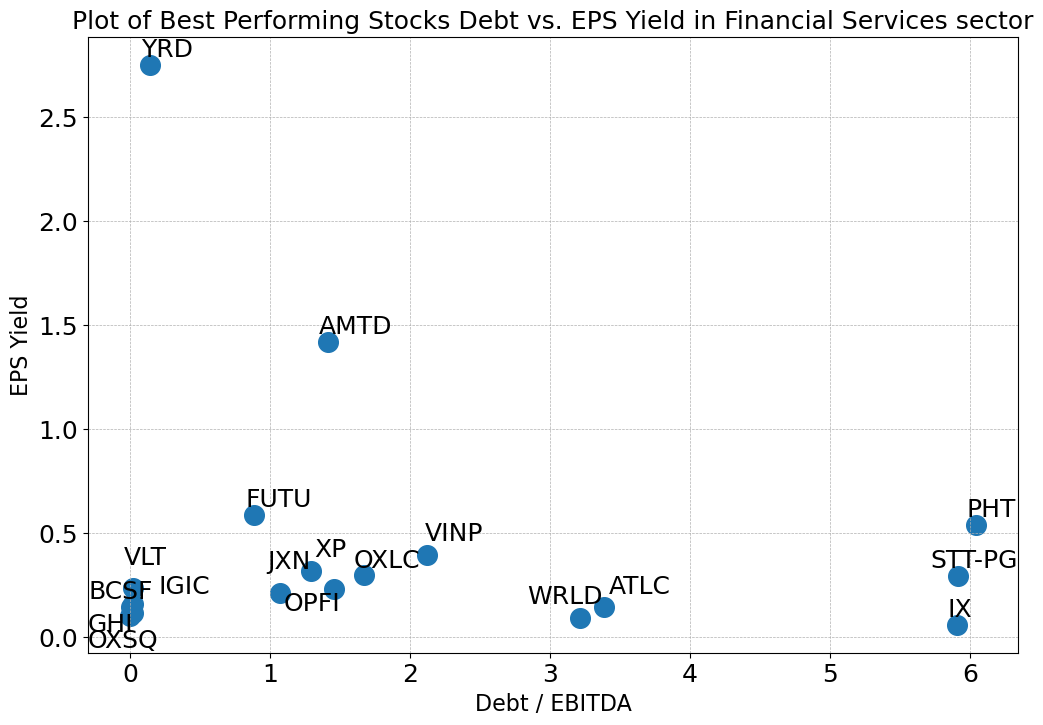

In [39]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'],s=200) 

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

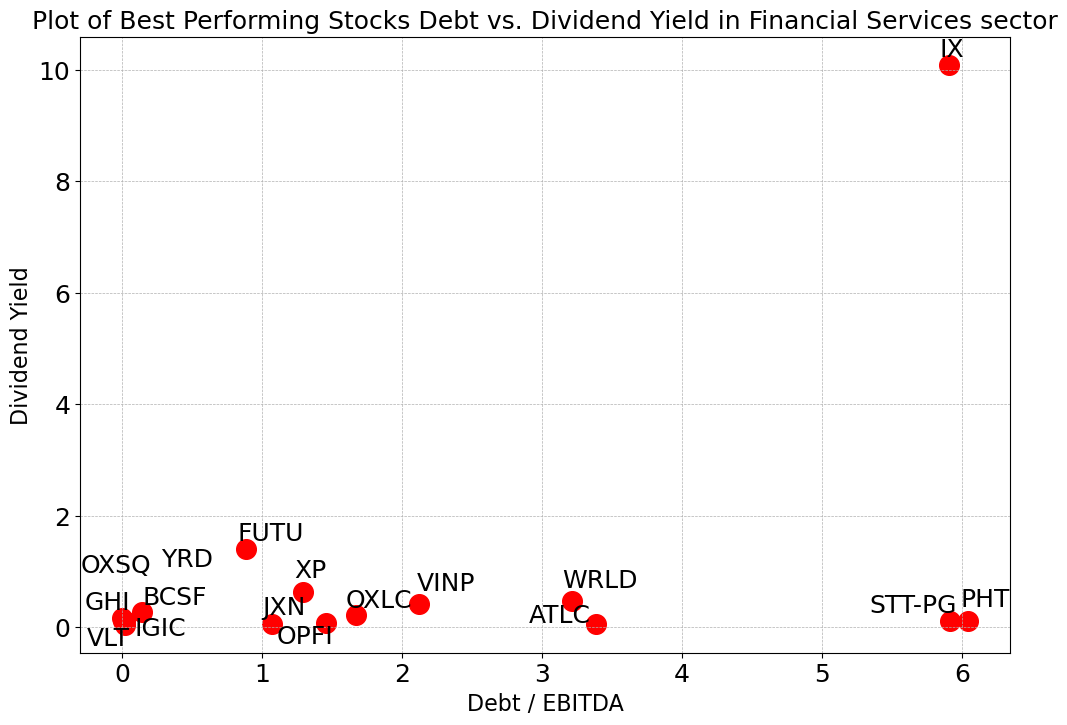

In [75]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

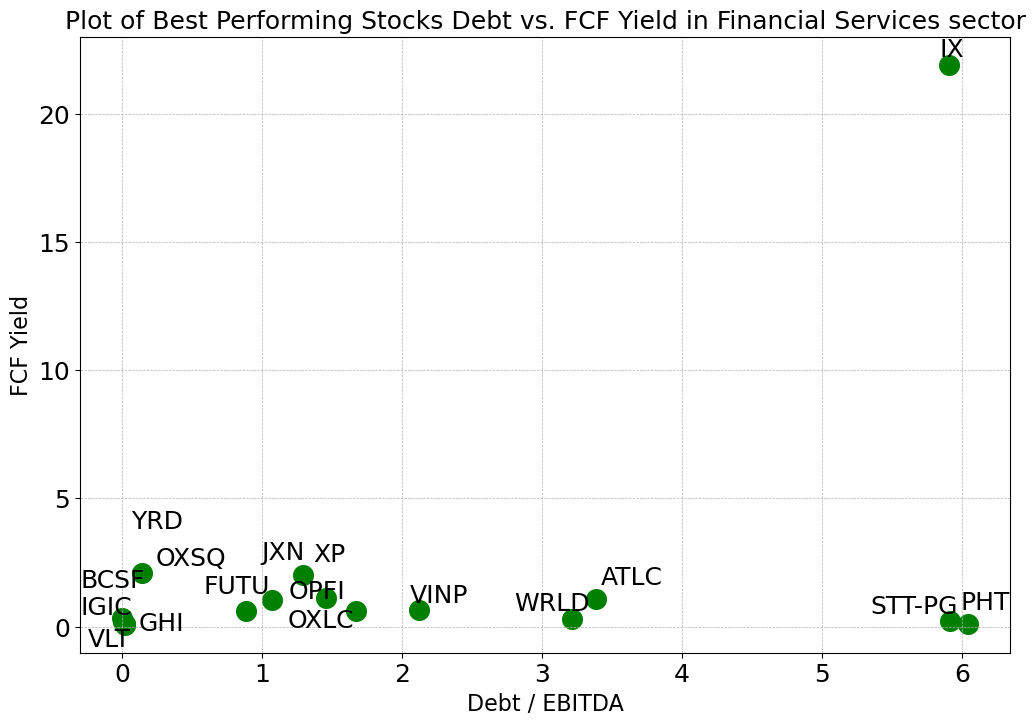

In [44]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [42]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [43]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [44]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


OXSQ
BCSF
IGIC
GHI
VLT
YRD
AMTD
IX
FUTU
XP
WRLD
VINP
PHT
OXLC
STT-PG
OPFI
ATLC
JXN


In [45]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} price error: {e}")
        continue


In [46]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [47]:
all_returns.append(GSPC_returns)

In [48]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [49]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

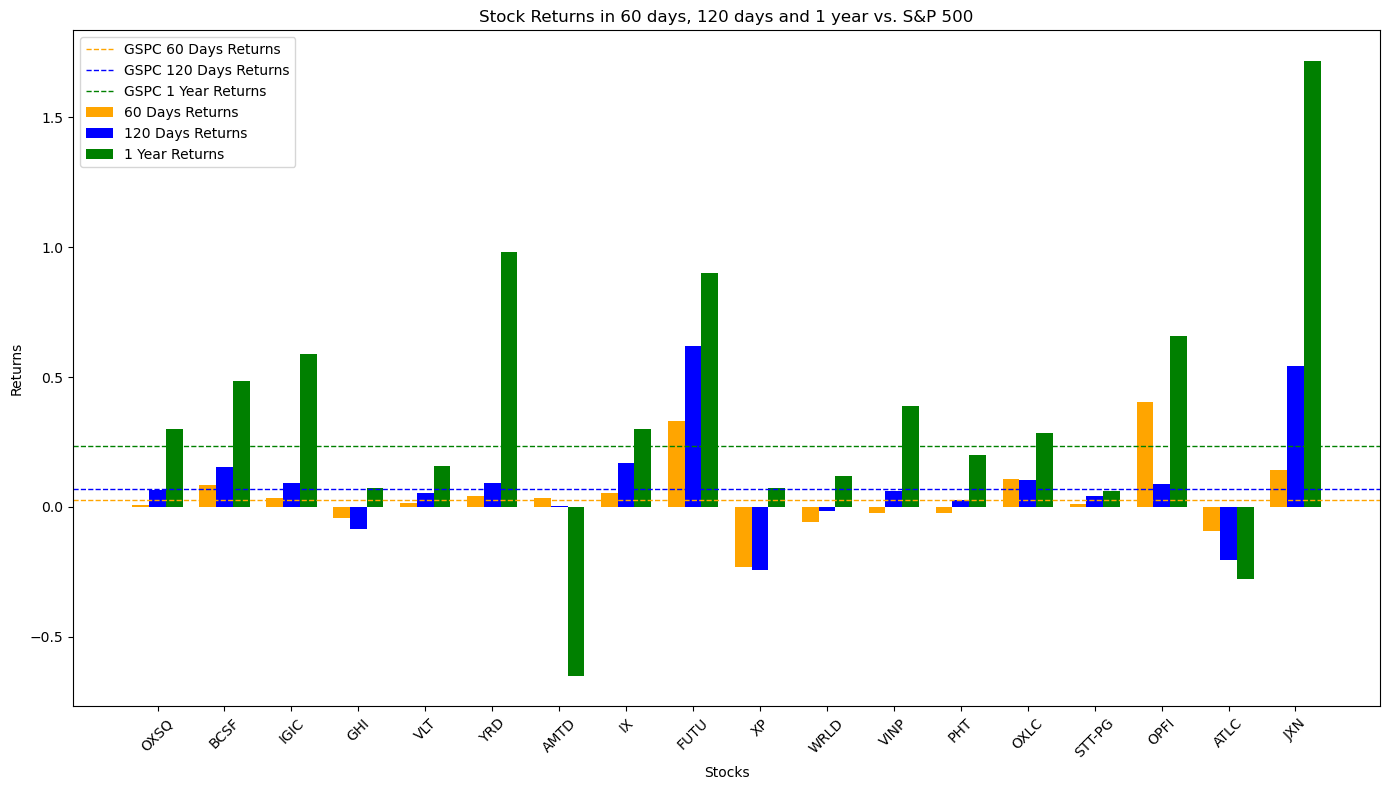

In [50]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [51]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 4.42%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 8.71%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 35.34%
Return for Investing in S&P500 in 1 year is 23.62%


In [10]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

0       OXSQ
1       BCSF
4       IGIC
5        GHI
6        VLT
14       YRD
15      AMTD
19        IX
23      FUTU
24        XP
26      WRLD
28      VINP
31       PHT
34      OXLC
35    STT-PG
38      OPFI
40      ATLC
41       JXN
Name: Code, dtype: object


In [11]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []

for s in code_list:
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

18


In [12]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[0.         0.0336977  0.0353404  0.0287835  0.05579655 0.04655574
 0.07652792 0.10456927 0.13921722 0.11453853 0.11217616 0.09454742
 0.11937733 0.13734216 0.1418175  0.14291763 0.12564823 0.11053438
 0.09830214 0.10896585 0.06414839 0.0403606  0.09101004 0.08880412
 0.16061414 0.16857354 0.18631201 0.19284463 0.22365728 0.26155666
 0.25478407 0.2857801  0.23244416 0.24709277 0.27703425 0.22699806
 0.25925964 0.27035545 0.27144002 0.28414553 0.28673139 0.29319127
 0.27586538 0.30002585 0.31254311 0.27965232 0.28362418 0.31480926
 0.35178637 0.36454311 0.37572517 0.34828467 0.35342001]


In [13]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [14]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Financial Services Sector is:  0.10462297505408392


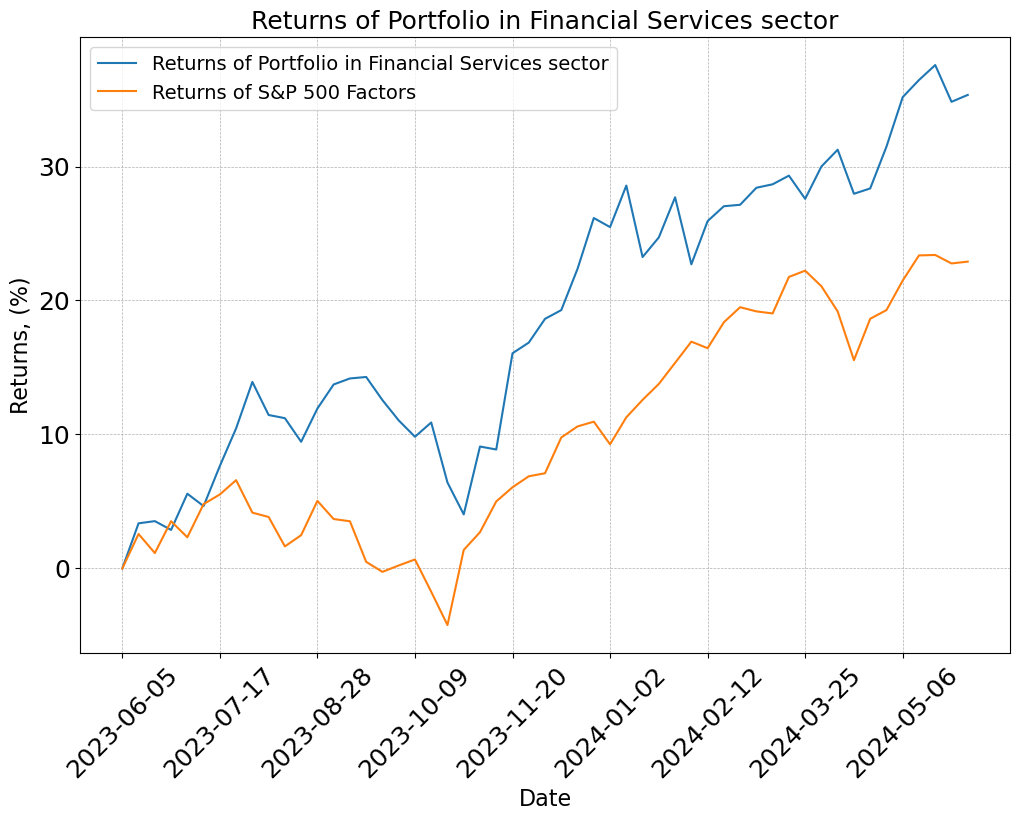

In [15]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()